# TASK

*Project focused on forecasting Apple Inc. (AAPL) stock prices for the next 30 days to aid investors, traders, and financial analysts in making buy/sell decisions.

*The project involves using a dataset with financial, economic, and sentiment-related variables that influence Apple's stock price.

*Load the data from "Apples_stock price dataset.xlsx", handle missing values and outliers, filter the data to include only observations within the specified trading hours (4:00 AM to 8:00 PM ET) and exclude weekends, and then build and explain the following models: ARIMA, SARIMA, VAR, Random Forest Regressor, XGBoost/LightGBM, LSTM, Prophet, and Hybrid Models.

# 1.Business Objective and Data Analysis
The core objective is to predict the Apple stock market price for the next 30 days to help market participants monitor stock prices and make informed buy/sell decisions.

# STEP-1 : Data Loading and Initial Preparation
Subtask:
Load the data from the provided Excel file into a pandas DataFrame.

**Reasoning**:
Import pandas and load the data from the Excel file into a DataFrame.

In [38]:
import pandas as pd
import numpy as np

# Load the dataset (file_path)
df = pd.read_excel("C:\\Users\\kunta\\OneDrive\\Desktop\\Excelr group project\\Apples_stock price dataset.xlsx")
df

,timestamp,stock_price,nasdaq_index,sp500_index,inflation_rate,unemployment_rate,interest_rate,market_sentiment
0,2010-01-01 00:00:00,102.483571,7984.160950,2994.240923,4.585202,6.837412,1.175768,0.095094
1,2010-01-01 01:00:00,99.347236,7995.706186,2995.831788,2.628987,5.851430,1.918567,-0.241960
2,2010-01-01 02:00:00,103.315558,8000.887651,2998.119650,2.616145,6.235115,2.436716,-0.833554
3,2010-01-01 03:00:00,107.730823,7995.763963,3004.532651,3.115002,6.397255,2.369055,0.059836
4,2010-01-01 04:00:00,98.983464,8002.448861,2997.154387,4.270254,4.942654,1.929987,-0.223077
...,...,...,...,...,...,...,...,...
99995,2021-05-29 11:00:00,498.719645,507952.135502,200804.699078,3.824464,3.620599,3.323797,-0.161068
99996,2021-05-29 12:00:00,497.035439,507943.811002,200807.796915,1.753618,4.904652,2.723226,0.170113
99997,2021-05-29 13:00:00,501.968810,507932.520304,200809.969048,2.423570,4.993412,1.677252,-0.479887
99998,2021-05-29 14:00:00,498.905984,507942.053787,200807.345521,2.787465,5.861924,1.075077,0.401896


In [6]:
# Ensure the date column is set as the index and in datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

In [8]:
print("Initial Data Head:")
df.head()

Initial Data Head:


,stock_price,nasdaq_index,sp500_index,inflation_rate,unemployment_rate,interest_rate,market_sentiment
timestamp,,,,,,,
2010-01-01 00:00:00,102.483571,7984.160950,2994.240923,4.585202,6.837412,1.175768,0.095094
2010-01-01 01:00:00,99.347236,7995.706186,2995.831788,2.628987,5.851430,1.918567,-0.241960
2010-01-01 02:00:00,103.315558,8000.887651,2998.119650,2.616145,6.235115,2.436716,-0.833554
2010-01-01 03:00:00,107.730823,7995.763963,3004.532651,3.115002,6.397255,2.369055,0.059836
2010-01-01 04:00:00,98.983464,8002.448861,2997.154387,4.270254,4.942654,1.929987,-0.223077


In [9]:
print("\nInitial Data Info:")
df.info()


Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100000 entries, 2010-01-01 00:00:00 to 2021-05-29 15:00:00
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   stock_price        99969 non-null  float64
 1   nasdaq_index       99993 non-null  float64
 2   sp500_index        99996 non-null  float64
 3   inflation_rate     99992 non-null  float64
 4   unemployment_rate  99996 non-null  float64
 5   interest_rate      99998 non-null  float64
 6   market_sentiment   99996 non-null  float64
dtypes: float64(7)
memory usage: 6.1 MB


In [12]:
df.shape

(100000, 8)

In [13]:
df.describe()

,timestamp,stock_price,nasdaq_index,sp500_index,inflation_rate,unemployment_rate,interest_rate,market_sentiment
count,100000,99969.000000,99993.000000,99996.000000,99992.000000,99996.000000,99998.000000,99996.000000
mean,2015-09-15 07:30:00,299.991904,259114.622519,101463.085069,3.004255,4.996003,2.001474,0.003208
min,2010-01-01 00:00:00,9.537676,7984.160950,2981.778422,1.000002,3.000021,0.500135,-0.999990
25%,2012-11-07 15:45:00,248.619582,134716.834762,51573.589744,2.005934,3.999036,1.254851,-0.498332
50%,2015-09-15 07:30:00,300.071948,257861.008478,100923.141212,3.005833,4.990133,2.000173,0.004348
75%,2018-07-22 23:15:00,351.442877,385205.578140,151634.820165,4.001412,5.994514,2.750588,0.504524
max,2021-05-29 15:00:00,601.664858,507957.788157,200815.813093,4.999993,6.999958,3.499985,0.999986
std,NaN,91.443363,144514.371806,57294.513880,1.152769,1.154703,0.864929,0.578063


# Step-1.1 : Handle missing values
Subtask:
Identify and fill missing values in the dataset using appropriate methods.

**Reasoning**:
Check for and fill missing values in the dataframe using Median.

In [18]:
print("Missing values before filling:")
print(df.isnull().sum())

Missing values before filling:
timestamp             0
stock_price          31
nasdaq_index          7
sp500_index           4
inflation_rate        8
unemployment_rate     4
interest_rate         2
market_sentiment      4
dtype: int64


In [19]:
# Fill missing numeric values with median
df = df.fillna(df.median(numeric_only=True))

In [20]:
print("\nMissing values after filling:")
print(df.isnull().sum())


Missing values after filling:
timestamp            0
stock_price          0
nasdaq_index         0
sp500_index          0
inflation_rate       0
unemployment_rate    0
interest_rate        0
market_sentiment     0
dtype: int64


# Step-2:Exploratory Data Analysis (EDA) and Data Cleaning

Subtask:
Generate visualizations for the processed DataFrame to understand the data distribution and relationships.

**Step-2.1 :**
Generate histograms for all numerical columns to visualize their distributions.

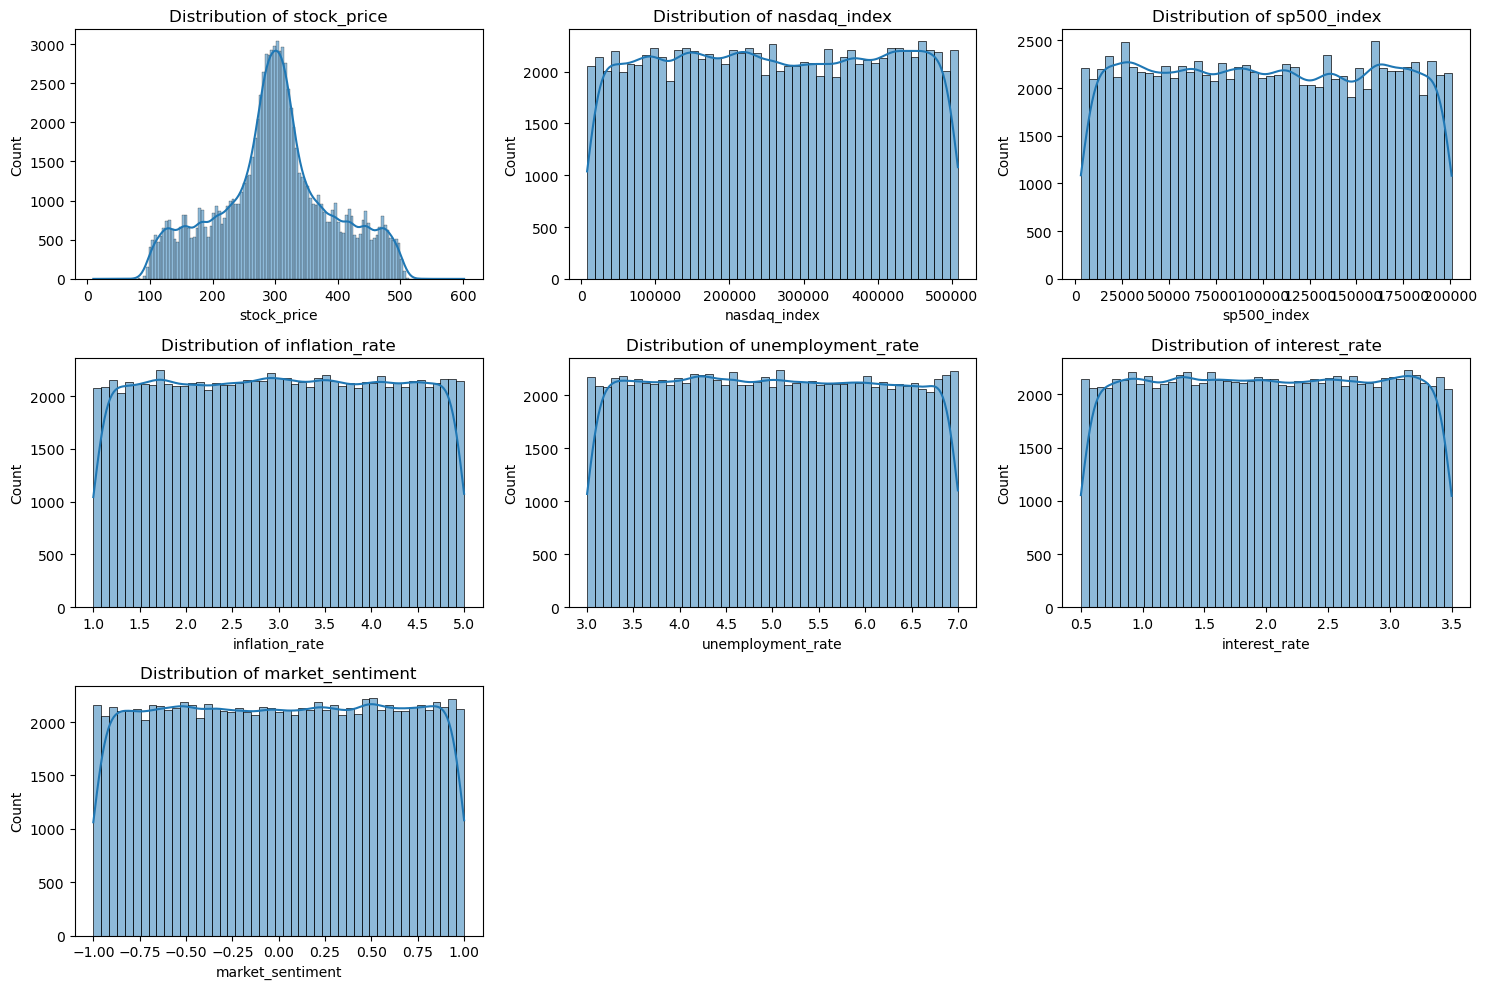

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = ['stock_price', 'nasdaq_index', 'sp500_index', 'inflation_rate', 'unemployment_rate', 'interest_rate', 'market_sentiment']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

**Step-2.2:**
Generate scatter plots for 'stock_price' against other numerical columns to visualize relationships.

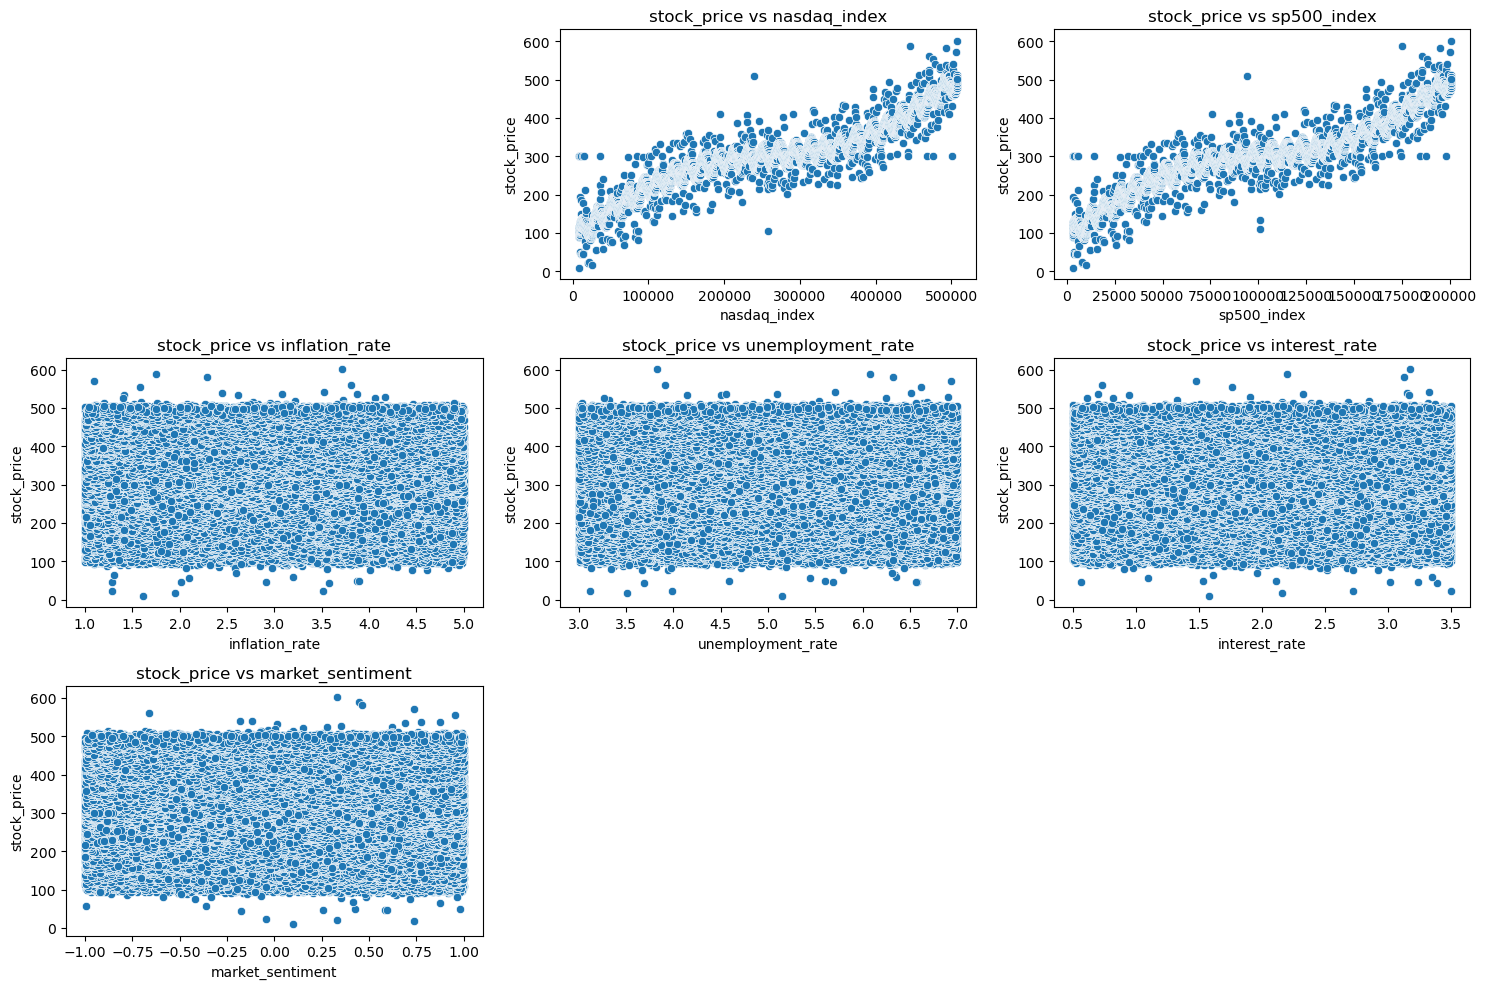

In [24]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    if col != 'stock_price':
        plt.subplot(3, 3, i + 1)
        sns.scatterplot(x=df[col], y=df['stock_price'])
        plt.title(f'stock_price vs {col}')
plt.tight_layout()
plt.show()

**Step-2.3:**
 Generate a heatmap to visualize the correlation matrix of the numerical columns.

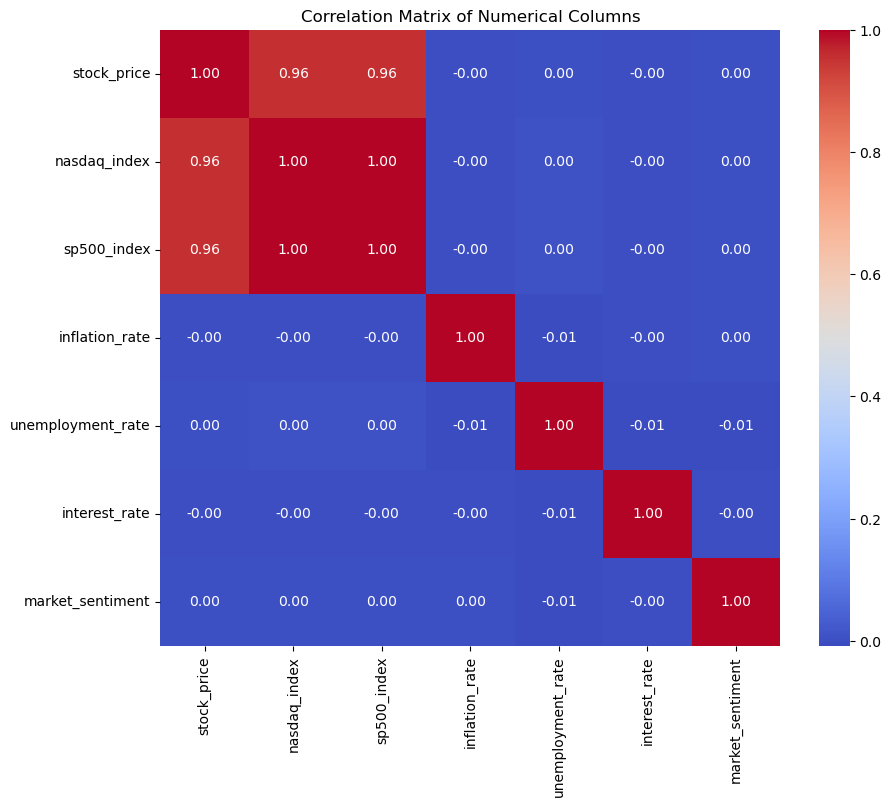

In [25]:
plt.figure(figsize=(10, 8))
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

**Step-2.4:**
Generate box plots for all numerical columns to visualize potential outliers and distribution spread.

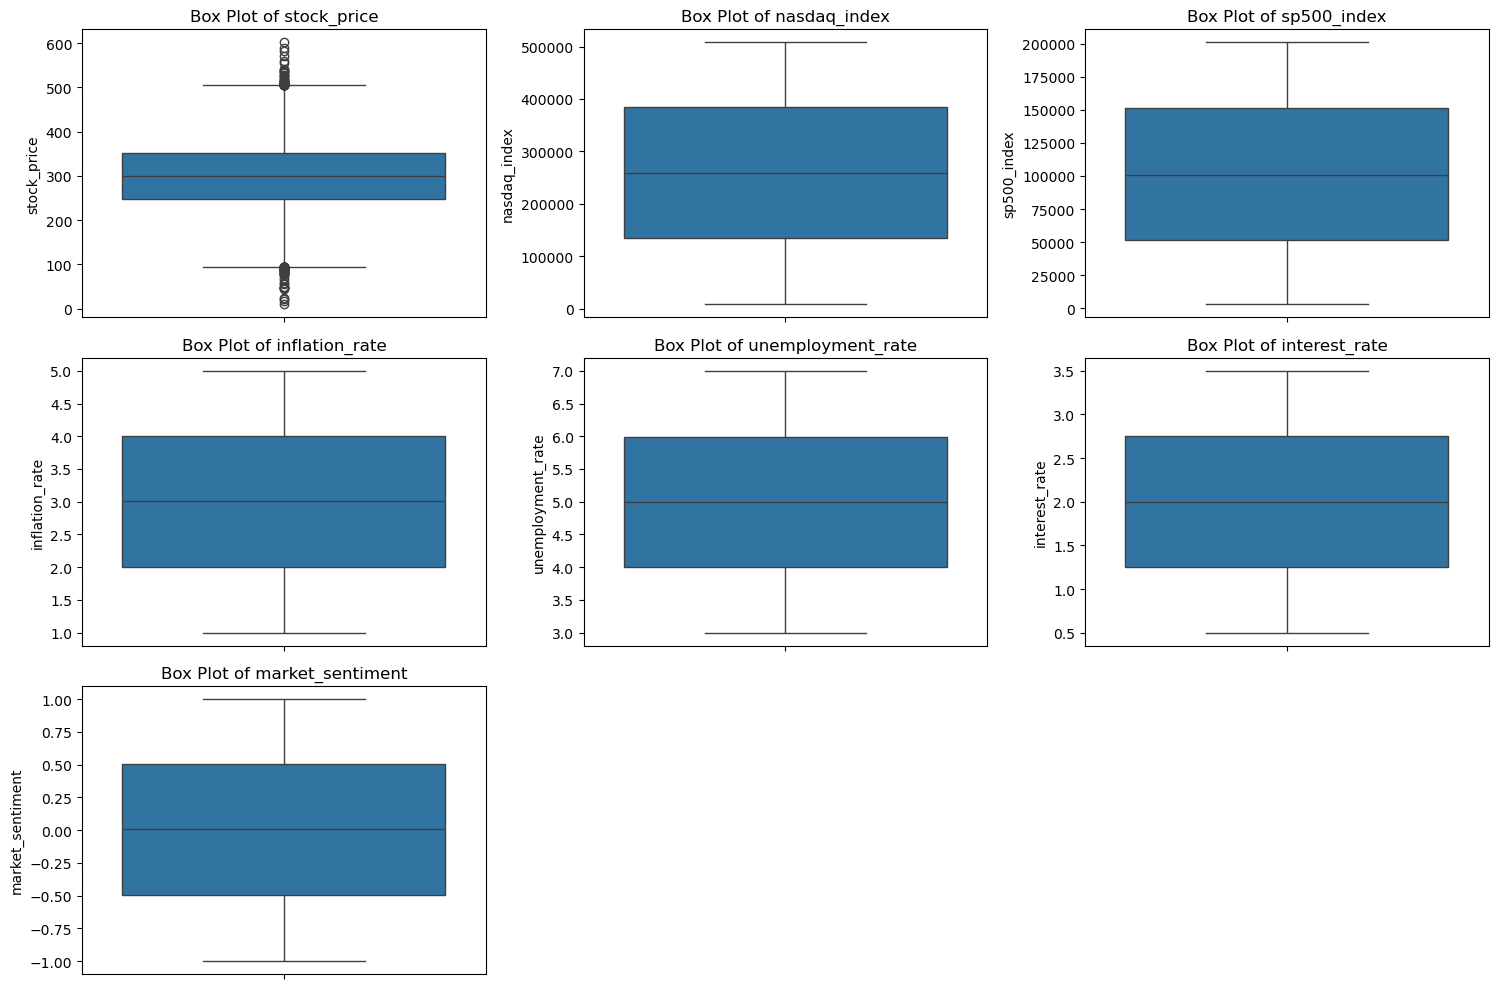

In [26]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

**Step-2.5:** Handle Outliers (Fill, Do Not Drop)

Outliers must be filled/capped, not dropped. A common method is the Interquartile Range (IQR) capping, which replaces extreme values with the boundaries

In [29]:
def cap_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the values
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    return df

In [31]:
# Apply capping to all relevant numerical columns
numerical_cols = ['stock_price', 'nasdaq_index', 'sp500_index',
                  'inflation_rate', 'unemployment_rate', 'interest_rate', 'market_sentiment']

for col in numerical_cols:
    df = cap_outliers_iqr(df, col)

print("\nOutliers have been capped using IQR method.")
display(df.head())


Outliers have been capped using IQR method.


,timestamp,stock_price,nasdaq_index,sp500_index,inflation_rate,unemployment_rate,interest_rate,market_sentiment
0,2010-01-01 00:00:00,102.483571,7984.160950,2994.240923,4.585202,6.837412,1.175768,0.095094
1,2010-01-01 01:00:00,99.347236,7995.706186,2995.831788,2.628987,5.851430,1.918567,-0.241960
2,2010-01-01 02:00:00,103.315558,8000.887651,2998.119650,2.616145,6.235115,2.436716,-0.833554
3,2010-01-01 03:00:00,107.730823,7995.763963,3004.532651,3.115002,6.397255,2.369055,0.059836
4,2010-01-01 04:00:00,98.983464,8002.448861,2997.154387,4.270254,4.942654,1.929987,-0.223077


## Step-3:Filter data by trading hours

### Subtask:
Filter the data to include only observations within the specified trading hours (4:00 AM to 8:00 PM ET) and exclude weekends.

**Reasoning**:
I need to filter the data based on the timestamp column to include only specific hours and exclude weekends. This requires converting the 'timestamp' column to datetime objects first, then applying the filtering conditions for hours and weekends, and finally displaying the head of the filtered DataFrame.

In [39]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df_filtered = df[(df['timestamp'].dt.hour >= 4) & (df['timestamp'].dt.hour <= 20)]
df_filtered = df_filtered[df_filtered['timestamp'].dt.dayofweek < 5]
display(df_filtered.head())

,timestamp,stock_price,nasdaq_index,sp500_index,inflation_rate,unemployment_rate,interest_rate,market_sentiment
4,2010-01-01 04:00:00,98.983464,8002.448861,2997.154387,4.270254,4.942654,1.929987,-0.223077
5,2010-01-01 05:00:00,99.022103,8011.832789,3004.510779,2.321292,4.095568,1.664753,-0.828119
6,2010-01-01 06:00:00,108.127409,8028.157784,3010.735533,2.626140,5.447153,2.995546,-0.813849
7,2010-01-01 07:00:00,104.107075,8027.722289,3015.504909,4.056720,3.377880,3.276263,0.002849
8,2010-01-01 08:00:00,97.961085,8029.541811,3020.187389,2.099831,4.815785,1.761161,-0.634609


**Step-3.1: Explore data**

### Subtask:
Perform exploratory data analysis to understand the characteristics of the data, including visualizing the stock prices over time.


**Reasoning**:
Perform exploratory data analysis by printing descriptive statistics and data types, and then visualize the stock price over time.

In [40]:
print("Descriptive statistics of the filtered data:")
display(df_filtered.describe())

Descriptive statistics of the filtered data:


,timestamp,stock_price,nasdaq_index,sp500_index,inflation_rate,unemployment_rate,interest_rate,market_sentiment
count,50592,50574.000000,50588.000000,50589.000000,50588.000000,50588.000000,50592.000000,50592.000000
mean,2015-09-15 19:11:36.774193408,300.052183,259173.150757,101487.400021,3.008912,4.997872,2.000613,0.001613
min,2010-01-01 04:00:00,21.246547,8002.448861,2997.154387,1.000002,3.000111,0.500135,-0.999990
25%,2012-11-08 02:00:00,248.692352,134778.076396,51584.559264,2.008276,3.998066,1.252027,-0.501901
50%,2015-09-16 00:00:00,300.080789,257970.004799,100986.704609,3.008890,4.995886,1.997309,0.003999
75%,2018-07-23 22:00:00,351.492456,385291.863441,151664.237223,4.007123,5.995707,2.756850,0.501860
max,2021-05-28 20:00:00,589.000000,507957.788157,200780.071069,4.999857,6.999927,3.499985,0.999916
std,NaN,91.446437,144504.272713,57290.335208,1.151914,1.154320,0.867870,0.577064


In [41]:
print("\nData types of the filtered data:")
display(df_filtered.info())


Data types of the filtered data:
<class 'pandas.core.frame.DataFrame'>
Index: 50592 entries, 4 to 99980
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   timestamp          50592 non-null  datetime64[ns]
 1   stock_price        50574 non-null  float64       
 2   nasdaq_index       50588 non-null  float64       
 3   sp500_index        50589 non-null  float64       
 4   inflation_rate     50588 non-null  float64       
 5   unemployment_rate  50588 non-null  float64       
 6   interest_rate      50592 non-null  float64       
 7   market_sentiment   50592 non-null  float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 3.5 MB


None

In [43]:
df_filtered.shape

(50592, 8)

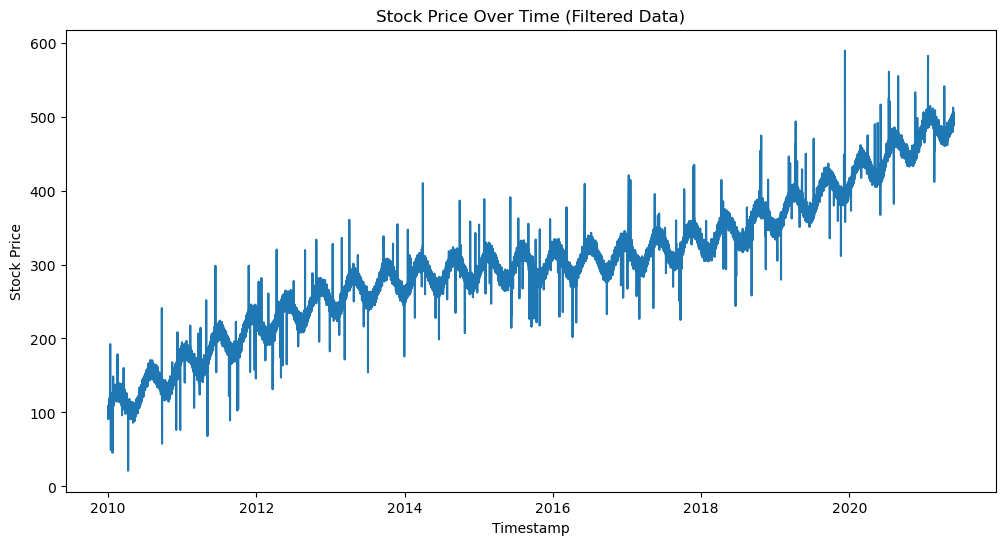

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df_filtered['timestamp'], df_filtered['stock_price'])
plt.title('Stock Price Over Time (Filtered Data)')
plt.xlabel('Timestamp')
plt.ylabel('Stock Price')
plt.show()

**Step-3.2:Decomposition-**

You’re using the seasonal_decompose() function from the statsmodels library.
It performs time series decomposition using a moving average approach for trend, sesaonality , residual for stock_price column.Assuming hourly data, we can try period = 24 (daily seasonality)

* Trend – the long-term movement of prices (upward or downward)

* Seasonality – repeating patterns that occur at regular intervals (e.g., daily)

* Residual (Noise) – random variation that’s not explained by trend or seasonality

In [54]:
df_filtered['stock_price'].isna().sum()#Check for missing values
floot

np.int64(18)

In [55]:
df_filtered['stock_price'] = df_filtered['stock_price'].interpolate(method='linear') #Fill or interpolate missing values

In [57]:
# Ensure datetime index is set
# seasonal_decompose() expects a time-based index (like your timestamp column).
df_filtered['timestamp'] = pd.to_datetime(df_filtered['timestamp'])
df_filtered.set_index('timestamp', inplace=True)

In [58]:
df_filtered.shape

(50592, 7)

In [59]:
df.head()

,stock_price,nasdaq_index,sp500_index,inflation_rate,unemployment_rate,interest_rate,market_sentiment
timestamp,,,,,,,
2010-01-01 00:00:00,102.483571,7984.160950,2994.240923,4.585202,6.837412,1.175768,0.095094
2010-01-01 01:00:00,99.347236,7995.706186,2995.831788,2.628987,5.851430,1.918567,-0.241960
2010-01-01 02:00:00,103.315558,8000.887651,2998.119650,2.616145,6.235115,2.436716,-0.833554
2010-01-01 03:00:00,107.730823,7995.763963,3004.532651,3.115002,6.397255,2.369055,0.059836
2010-01-01 04:00:00,98.983464,8002.448861,2997.154387,4.270254,4.942654,1.929987,-0.223077


In [60]:
from statsmodels.tsa.seasonal import seasonal_decompose   #Importing required function

**Reason:** What happens here:

 df_filtered['stock_price'] → The time series you want to decompose.

 model='additive' → Assumes the data can be represented as:

 Stock Price=Trend+Seasonal+Residual

 (You can use "multiplicative" if your data changes proportionally over time.)

 period=24 → Because your data is hourly, and there are 24 hours in a day, this captures daily seasonality.

 So, this line mathematically decomposes the stock price into 3 parts.

In [62]:
# Performing decomposition
decomposition = seasonal_decompose(df_filtered['stock_price'], model='additive', period=24)  

In [63]:
# Extracting components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

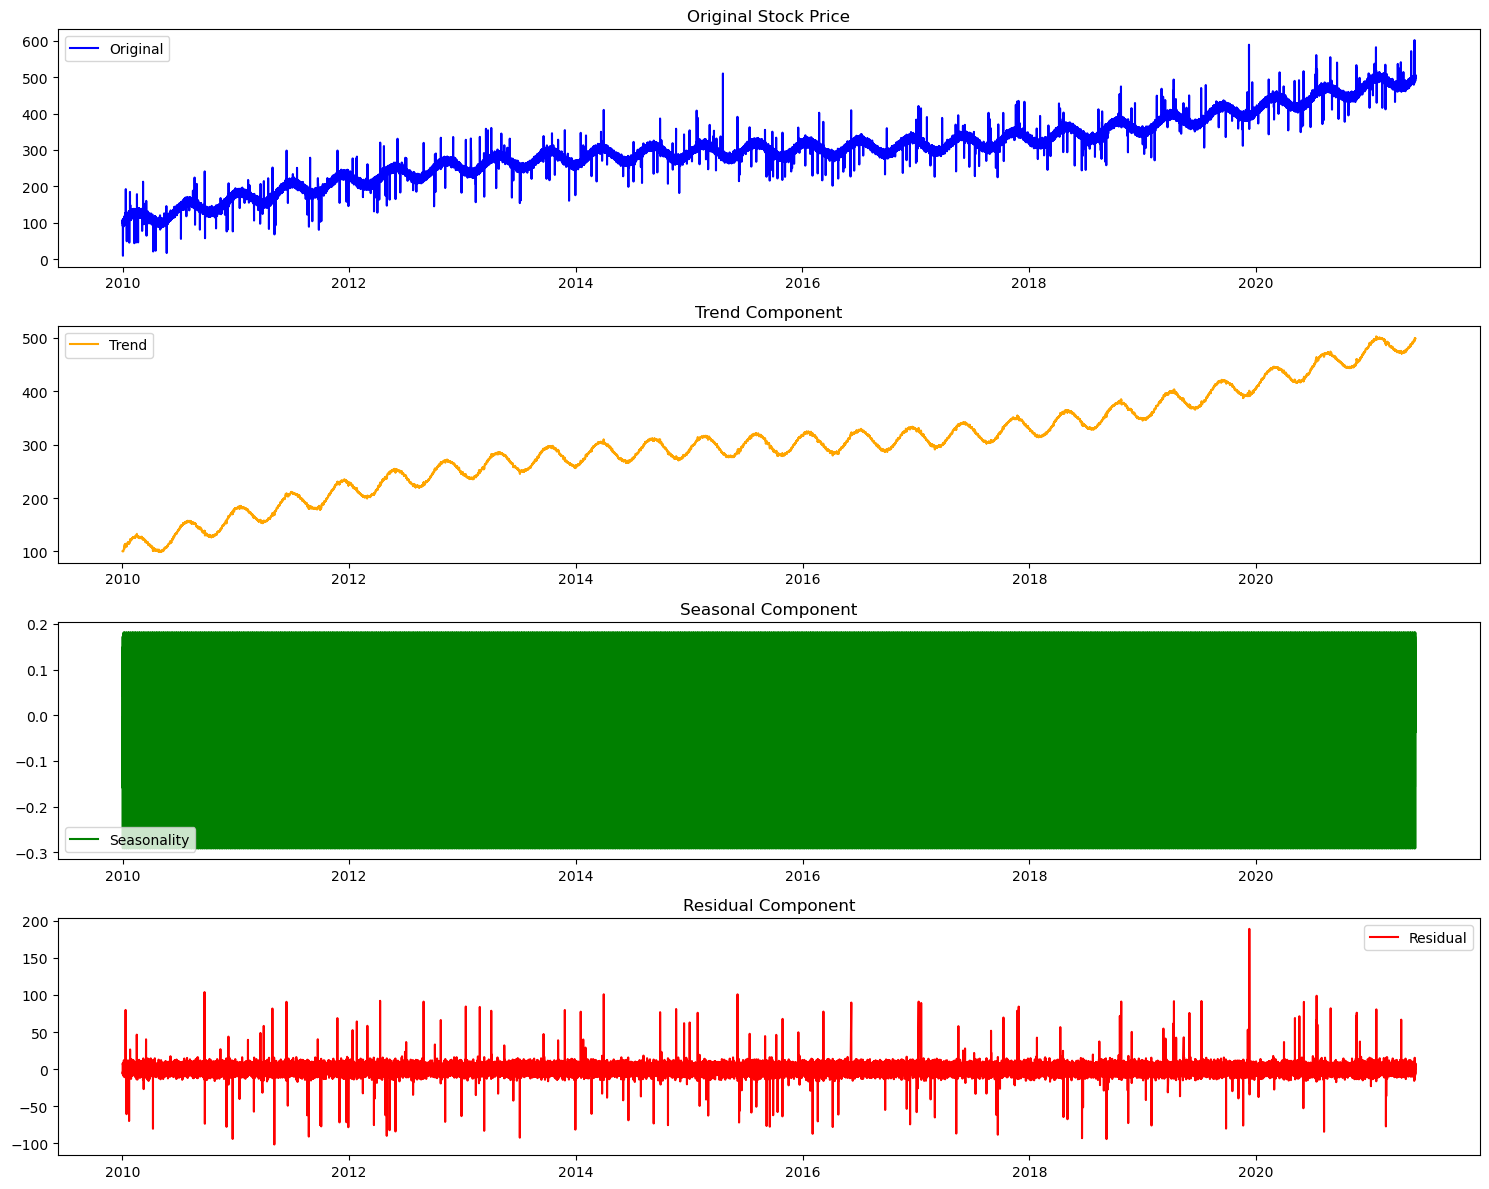

In [72]:
# Plotting each component
plt.figure(figsize=(15,12))  #Creates a large 15x12 inch figure to fit all 4 plots neatly.
plt.subplot(4,1,1)
plt.plot(df['stock_price'], label='Original', color='blue')  #Plots the original stock price in blue.
plt.title('Original Stock Price')
plt.legend()

plt.subplot(4,1,2)
plt.plot(trend, label='Trend', color='orange')     #Plots the trend (orange line).
plt.title('Trend Component')
plt.legend() 

plt.subplot(4,1,3)
plt.plot(seasonal, label='Seasonality', color='green')   # Plots the daily repeating seasonal pattern (green line).
plt.title('Seasonal Component')
plt.legend()

plt.subplot(4,1,4) 
plt.plot(residual, label='Residual', color='red')         # Plots the residual (noise) (red line).
plt.title('Residual Component')
plt.legend()

plt.tight_layout()  # Finally, Ensures the plots don’t overlap and displays the figure.
plt.show()